(-0.5, 4031.5, 3023.5, -0.5)

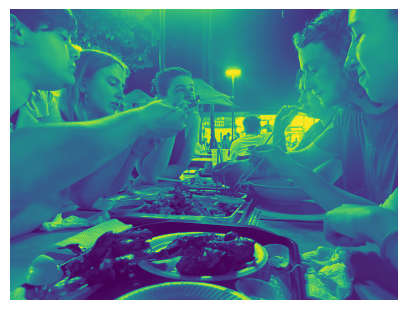

In [10]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams.update({'font.size': 18})

A = imread('spring_break.jpeg')
B = np.mean(A,-1)

plt.figure()
plt.imshow(B)
plt.axis('off')

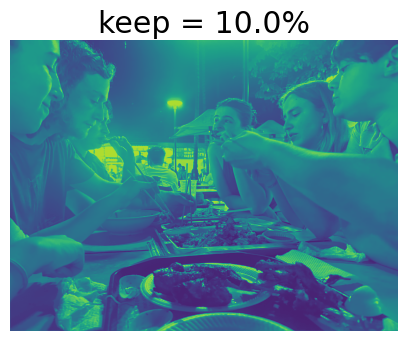

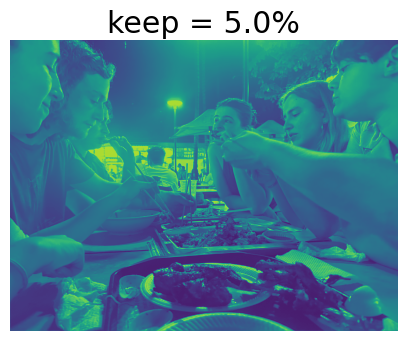

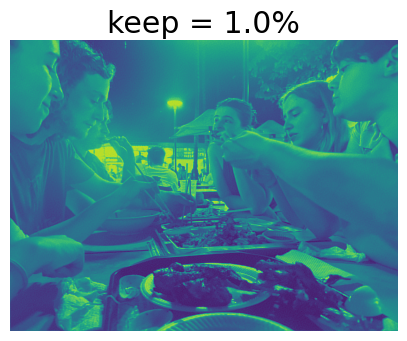

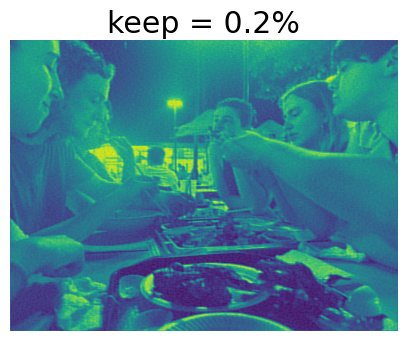

In [7]:
Bt = np.fft.fft2(B)
Bt_sort = np.sort(np.abs(Bt.reshape(-1))) # Sorting to help with the for-loop after

for keep in (0.1, 0.05, 0.01, 0.002):
    threshold = Bt_sort[int(np.floor((1-keep)*len(Bt_sort)))]
    index = np.abs(Bt) > threshold
    Bt_low = Bt * index
    a_low = np.fft.fft2(Bt_low).real
    plt.figure()
    plt.imshow(a_low, origin='lower')
    plt.axis('off')
    plt.title("keep = " + str(keep*100) + '%')

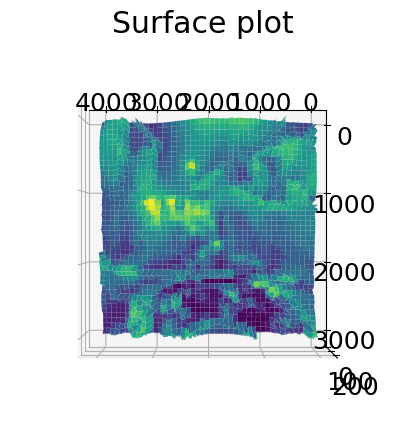

In [46]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y = np.meshgrid(np.arange(1,np.shape(B)[1]+1), np.arange(1,np.shape(B)[0]+1))
ax.plot_surface(x[0::10,0::10], y[0::10,0::10], B[0::10,0::10], cmap='viridis')
ax.set_title('Surface plot')
ax.mouse_init()
ax.view_init(90,90)
plt.show()